In [87]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from sinkhorn import sinkhorn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialization of variables:

In [88]:
# Points:
n=10
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x=x[:,np.newaxis]
y=y[:,np.newaxis]
# Cost:
C = (x-y.T)**2
# entropy factor:
eta = 2
# Kernel:
Kmat = np.exp(-eta*C)
def K(v):
    return Kmat@v
def Kt(v):
    return (Kmat.T)@v
# Target marginals:
p = np.ones((n,1))
p = p / np.sum(p)
q = np.ones((n,1))
p = q / np.sum(q)
# tolerance:
delta = 1e-1

### Sinkhorn projection computation:

[[1.         0.88175646 0.80337271 0.75551667 0.73281685 0.73281685
  0.75551667 0.80337271 0.88175646 1.        ]]
[[0.1997843  0.1761611  0.16050125 0.15094037 0.1464053  0.1464053
  0.15094037 0.16050125 0.1761611  0.1997843 ]]
[[-19.62582254]]


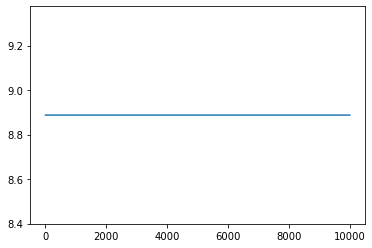

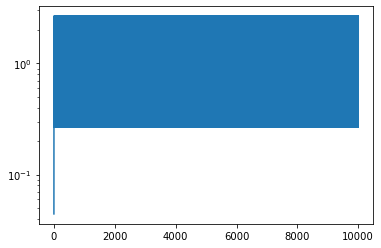

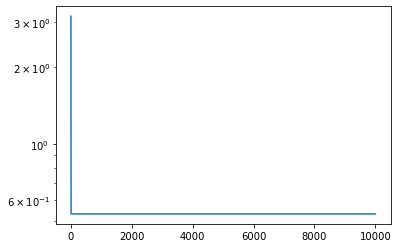

In [89]:
u,v,W,norm_u,norm_v,err = sinkhorn(K,Kt,p,q,delta)
print(u.T)
print(v.T)
print(W)
plt.plot(err)
plt.figure()
plt.semilogy(norm_u)
plt.figure()
plt.semilogy(norm_v)